# 🌳**Decision Tree**


A decision tree is a supervised machine learning model that splits the data into branches based on conditions, forming a tree-like structure.
It predicts the target variable by following these branches until it reaches a leaf.

✔ Works for classification and regression
✔ Easy to interpret
✔ Handles numerical and categorical data
✔ No need for feature scaling


## When Should You Use a Decision Tree?

### **Use it when:**

* You want a simple, interpretable model
* You have mixed data types (numbers + categories)
* You care more about interpretability than accuracy
* You have non-linear relationships
* You want something that naturally handles missing values (some implementations)

### **Avoid if:**

* You want high accuracy without tuning
* You have high-dimensional, noisy data (trees overfit easily)

---

## Key Terminology  

### 📌 **Root Node**
The starting point of the tree (first split).


### 📌 **Splitting**

Dividing the dataset based on a feature.

### 📌 **Decision Node**

Nodes that split into more nodes.

### 📌 **Leaf Node (Terminal Node)**

Final node that gives the prediction.

### 📌 **Entropy (Classification)**

Measures impurity.

$$
Entropy = - \sum p_i \log_2(p_i)
$$

### 📌 **Gini Impurity (Default in scikit-learn)**

Another impurity measure.

$$
Gini = 1 - \sum_i p_i^2
$$


### 📌 **Information Gain**

How much a split reduces impurity.

$$
\text{Information Gain} = I_{\text{parent}} - \sum_{c}\left(\frac{n_{c}}{n_{\text{parent}}}\right) I_{c}
$$



### 📌 **Pruning**

Cutting unnecessary branches to reduce overfitting.

### 📌 **Overfitting in Trees**

Trees keep splitting until they perfectly fit training data → terrible generalization.

---

## Important Parameters

### **criterion**

**Classification:** `'gini'` (default) or `'entropy'`

**Regression:** `'squared_error'` (default), `'absolute_error'`, `'friedman_mse'`, `'poisson'`

---

### **max_depth (Most important for preventing overfitting!)**

* Maximum depth of tree
* Default: `None` (grows until pure)
* Recommended: Start with 3–10
* Example: `max_depth=5`

---

### **min_samples_split**

* Minimum samples required to split a node
* Default: `2`
* Increase to prevent overfitting
* Example: `min_samples_split=20`

---

### **min_samples_leaf**

* Minimum samples required at each leaf node
* Default: `1`
* Smooths predictions in regression
* Example: `min_samples_leaf=10`

---

### **max_features**

* Number of features to consider for best split
  **Options:** `int`, `float`, `'sqrt'`, `'log2'`, `None`
* Reduces overfitting and training time
* Example: `max_features='sqrt'`

---

### **random_state**

Controls randomness for reproducibility
Example: `random_state=42`

---

### **ccp_alpha (Cost Complexity Pruning)**

* Post-pruning parameter
* Default: `0.0` (no pruning)
* Higher values = more pruning
* Example: `ccp_alpha=0.01`
---

### **splitter**

* `'best'`: Choose best split
* `'random'`: Choose random split (faster, more randomness)

---



## Decision Tree Classification Example  

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load dataset
penguins = sns.load_dataset("penguins").dropna()

# Features & target
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
clf = DecisionTreeClassifier(
    criterion='gini',        # impurity measure
    max_depth=4,             # avoid overfitting
    min_samples_leaf=3,
    random_state=42
)

clf.fit(X_train, y_train)

# Accuracy
print("Test Accuracy:", clf.score(X_test, y_test))



Test Accuracy: 0.9850746268656716


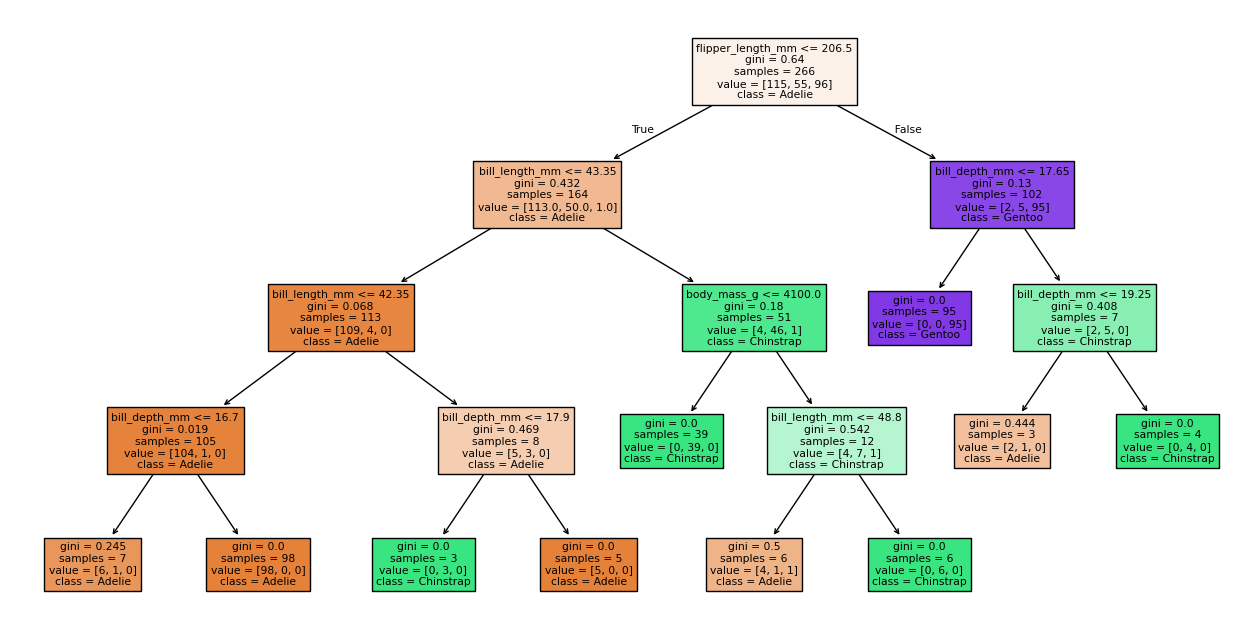

In [2]:
# Visualize tree
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [3]:
# Feature importance shows how much each feature contributed to the model's decisions.

feature_impo = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
})

print(feature_impo.sort_values(by="Importance", ascending=False))


             Feature  Importance
2  flipper_length_mm    0.524540
0     bill_length_mm    0.362224
1      bill_depth_mm    0.096937
3        body_mass_g    0.016299


## 6. Decision Tree Regression Example (California Housing Dataset)

In [4]:
# Regression with California Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.5844045983300754
R2 Score: 0.5540288505085005


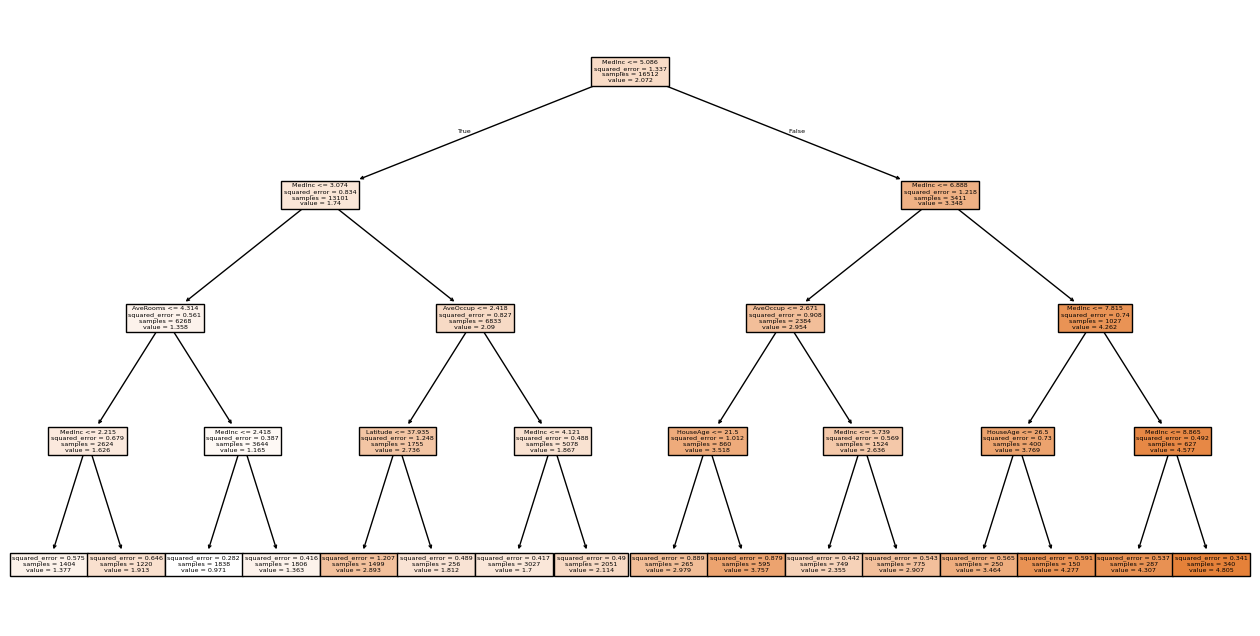

In [5]:
# Plot the regression tree

plt.figure(figsize=(16, 8))
plot_tree(reg, feature_names=data.feature_names, filled=True)
plt.show()

In [6]:
# Display feature importance
feature_importance = pd.Series(reg.feature_importances_, index=data.feature_names)
feature_importance.sort_values(ascending=False, inplace=True)

print("\nFeature Importance:\n")
print(feature_importance)


Feature Importance:

MedInc        0.833422
AveOccup      0.108674
AveRooms      0.024919
Latitude      0.019672
HouseAge      0.013313
AveBedrms     0.000000
Population    0.000000
Longitude     0.000000
dtype: float64


## Advantages & Disadvantages
### Advantages
- Easy to interpret
- No scaling required
- Works with both types of data

### Disadvantages
- Overfits easily
- Unstable
- Not best accuracy
